In this section, the team focused on selecting specific predictors that were deemed to have a higher correlation with the output of HeartDisease. This means that the respective risk factors has a bigger influence in one developing CVDs. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

In [ ]:
from google.colab import files
data_to_load = files.upload()
df = pd.read_csv('newHD.csv')
df.head()

Saving newHD.csv to newHD.csv


,Unnamed: 0,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,0,M,ATA,0,Normal,N,Up,40,140,289,172,0.0,0
1,1,F,NAP,0,Normal,N,Flat,49,160,180,156,1.0,1
2,2,M,ATA,0,ST,N,Up,37,130,283,98,0.0,0
3,3,F,ASY,0,Normal,Y,Flat,48,138,214,108,1.5,1
4,4,M,NAP,0,Normal,N,Up,54,150,195,122,0.0,0


In [ ]:
df_clean = df.drop(["Unnamed: 0"], axis=1)
df_clean

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,M,ATA,0,Normal,N,Up,40,140,289,172,0.0,0
1,F,NAP,0,Normal,N,Flat,49,160,180,156,1.0,1
2,M,ATA,0,ST,N,Up,37,130,283,98,0.0,0
3,F,ASY,0,Normal,Y,Flat,48,138,214,108,1.5,1
4,M,NAP,0,Normal,N,Up,54,150,195,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,Flat,45,110,264,132,1.2,1
914,M,ASY,1,Normal,N,Flat,68,144,193,141,3.4,1
915,M,ASY,0,Normal,Y,Flat,57,130,131,115,1.2,1
916,F,ATA,0,LVH,N,Flat,57,130,236,174,0.0,1


# Using correlation with heart disease to select continuous predictors

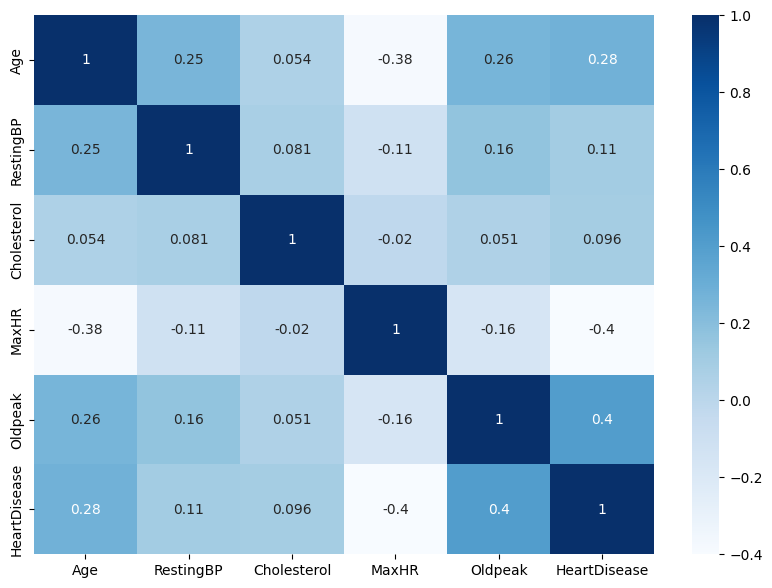

In [ ]:
continuous_predictors_hd = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]  
plt.figure(figsize=(10,7))
sns.heatmap(df_clean[continuous_predictors_hd].corr(),annot=True,cmap="Blues")
plt.show()

Based on the heat map, MaxHR(-0.4), Oldpeak(0.4), and Age(0.28) has the 3 highest correlation against HeartDisease. Cholesterol(0.096) and RestingBP(0.11) are discarded from the dataset.

# Using the bar graph to select categorical predictors 

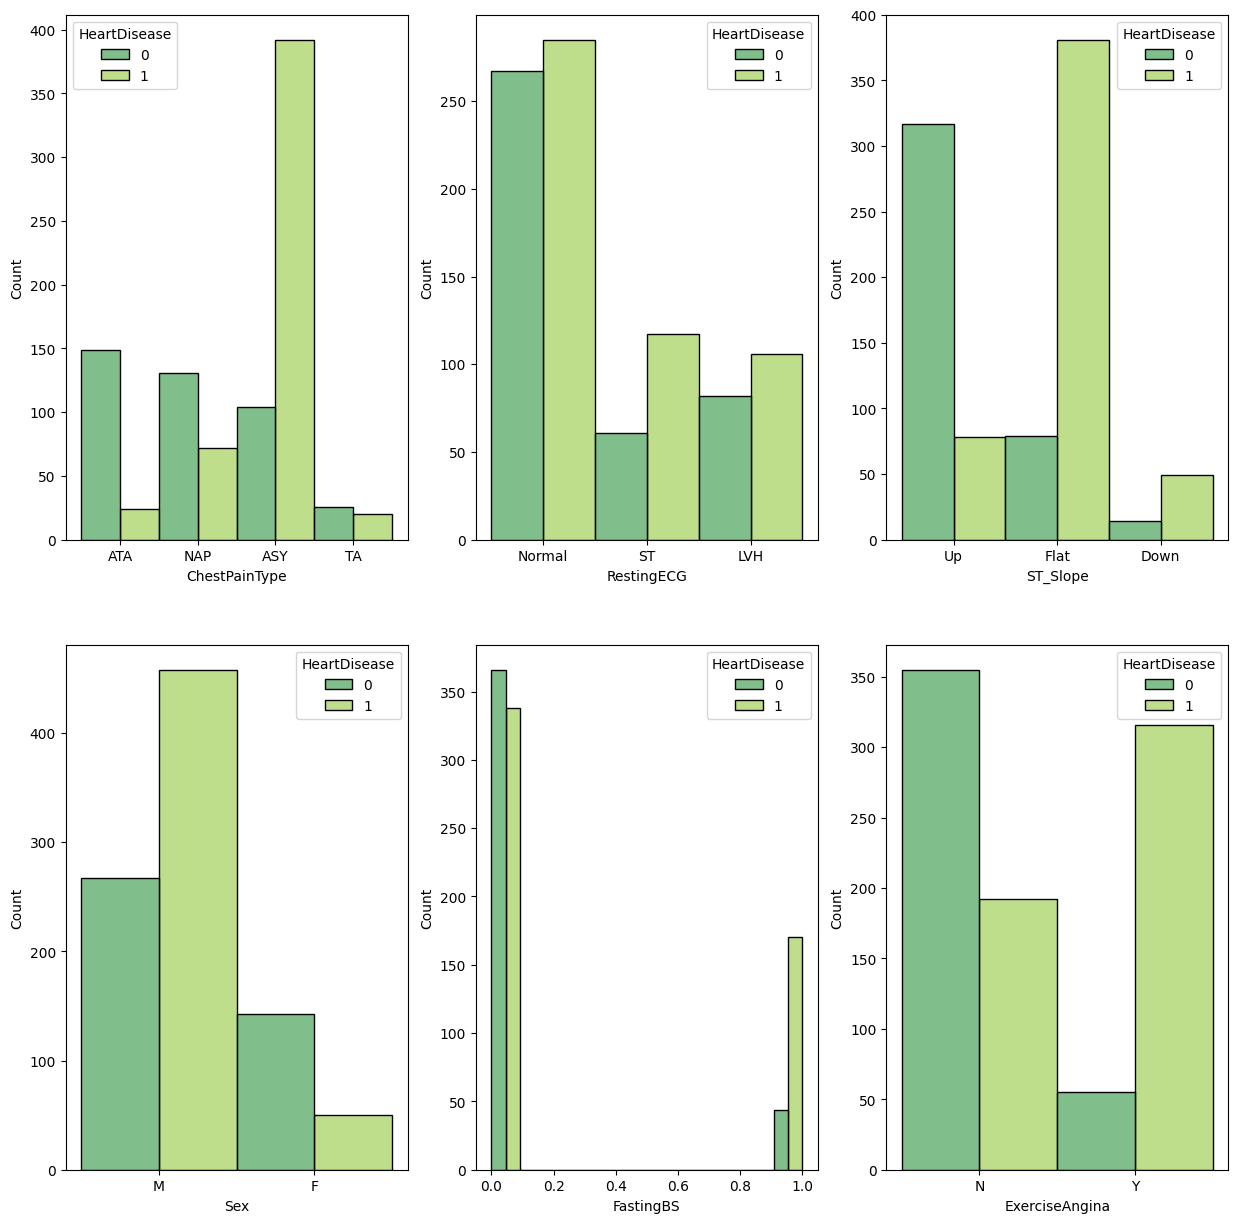

In [ ]:
categorical_predictors = ["ChestPainType", "RestingECG", "ST_Slope", "Sex", "FastingBS", "ExerciseAngina"]
count = 1
f, axes = plt.subplots(2,3, figsize=(15,15))
for i in categorical_predictors:
    plt.subplot(2,3,count)
    
    sns.histplot(data = df_clean, x = i, hue = "HeartDisease", kde=False, palette="summer", multiple = "dodge")
    count += 1

1) ChestPainType
  - For the sub category of ASY, there are over 350 data points with heart disease as compared to 100 without heart disease. This might suggest that ChestPainType could be a possible predictor of heart disease. 

2) RestingECG
  - For all the sub cateogry, the number of data points with and without heart disease does not show significant difference which suggest that RestingECG might not a good indicator of heart disease. 

3) ST_Slope
  - For the sub category of Flat and Up, there is a significant difference in the number of data points with and without heart disease making it a viable predictor of heart disease.

4) Sex 
  - For all the sub cateogry, the number of data points with and without does not show significant difference which suggest that RestingECG might not a good indicator of heart disease. 

5) FastingBS
  - for the sub category where FastingBS is true, there is a significant difference between the number of data points with and without heart disease, making it a viable predictor of heart disease.

6) ExerciseAngina
  - For the sub category of yes, there is a significant difference between the number of data points with and without heart disease, making it a viable predictor of heart disease.



## Percentage ratio of significant subcategories:

In [ ]:
labels = ["ChestPainType ASY with Heart Disease", "ChestPainType ASY without Heart Disease"]
values = [df[(df["ChestPainType"] == 'ASY') & (df["HeartDisease"] == 1)].count().to_numpy()[0],
        df[(df["ChestPainType"] == 'ASY') & (df["HeartDisease"] == 0)].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             marker_colors=['blue' ,'red'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Probability of heart disease with ChestPainType ASY', layout_showlegend=True)
fig.show()

In [ ]:
labels = ["ST_Slope Up with Heart Disease", "ST_Slope Up without Heart Disease"]
values = [df[(df["ST_Slope"] == 'Up') & (df["HeartDisease"] == 1)].count().to_numpy()[0],
        df[(df["ST_Slope"] == 'Up') & (df["HeartDisease"] == 0)].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             marker_colors=['green' ,'purple'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Probability of heart disease with ST_Slope Up', layout_showlegend=True)
fig.show()

In [ ]:
labels = ["ST_Slope Flat with Heart Disease", "ST_Slope Flat without Heart Disease"]
values = [df[(df["ST_Slope"] == 'Flat') & (df["HeartDisease"] == 1)].count().to_numpy()[0],
        df[(df["ST_Slope"] == 'Flat') & (df["HeartDisease"] == 0)].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             marker_colors=["magenta" ,'darkblue'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Probability of heart disease with ST_Slope Flat', layout_showlegend=True)
fig.show()

In [ ]:
labels = ["FastingBS normal with Heart Disease", "FastingBS normal without Heart Disease"]
values = [df[(df["FastingBS"] == 1.0) & (df["HeartDisease"] == 1)].count().to_numpy()[0],
        df[(df["FastingBS"] == 1.0) & (df["HeartDisease"] == 0)].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             marker_colors=['darkgreen' ,'darkblue'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Probability of heart disease with FastingBS normal', layout_showlegend=True)
fig.show()

In [ ]:
labels = ["ExerciseAngina Y with Heart Disease", "ExerciseAngina Y without Heart Disease"]
values = [df[(df["ExerciseAngina"] == 'Y') & (df["HeartDisease"] == 1)].count().to_numpy()[0],
        df[(df["ExerciseAngina"] == 'Y') & (df["HeartDisease"] == 0)].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             marker_colors=['cyan' ,'darkblue'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Probability of heart disease with ExerciseAngina Y', layout_showlegend=True)
fig.show()

# Extracting of selected numeric and categorical predictors

In [ ]:
dropped_variables = ["Cholesterol", "RestingBP", "RestingECG", "Sex"]
final_df = df_clean.drop(dropped_variables, axis=1)


In [ ]:
final_df.head()

,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,Age,MaxHR,Oldpeak,HeartDisease
0,ATA,0,N,Up,40,172,0.0,0
1,NAP,0,N,Flat,49,156,1.0,1
2,ATA,0,N,Up,37,98,0.0,0
3,ASY,0,Y,Flat,48,108,1.5,1
4,NAP,0,N,Up,54,122,0.0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ChestPainType   918 non-null    object 
 1   FastingBS       918 non-null    int64  
 2   ExerciseAngina  918 non-null    object 
 3   ST_Slope        918 non-null    object 
 4   Age             918 non-null    int64  
 5   MaxHR           918 non-null    int64  
 6   Oldpeak         918 non-null    float64
 7   HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 57.5+ KB


In [ ]:
final_df.to_csv('finalHD.csv')